In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import pandas as pd

In [14]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [16]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine,reflect=True)
# reflect the tables

In [18]:
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [20]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [21]:
#with inspector get the column names
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [22]:
# We can view all of the classes that automap found
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
#last date of the database:
#2017-08-23
#so until 2016-07-23

In [23]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Got the date using DB Browser 
# Perform a query to retrieve the data and precipitation scores

query_date = dt.date(2016,8,23)
sel = [Measurement.station, Measurement.date, Measurement.prcp]
averages = session.query(*sel).\
    filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

df = pd.DataFrame(averages, columns=['Station','Date','Precipitation'])
df.head()

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


,Station,Date,Precipitation
0,USC00519397,2016-08-24,0.08
1,USC00519397,2016-08-25,0.08
2,USC00519397,2016-08-26,0.00
3,USC00519397,2016-08-27,0.00
4,USC00519397,2016-08-28,0.01


In [28]:
df.dropna(how='any')

,Station,Date,Precipitation
0,USC00519397,2016-08-24,0.08
1,USC00519397,2016-08-25,0.08
2,USC00519397,2016-08-26,0.00
3,USC00519397,2016-08-27,0.00
4,USC00519397,2016-08-28,0.01
...,...,...,...
2216,USC00516128,2017-08-17,0.13
2218,USC00516128,2017-08-19,0.09
2220,USC00516128,2017-08-21,0.56
2221,USC00516128,2017-08-22,0.50


In [36]:
df = df.sort_values(by=['Date'])
df.head()

,Station,Date,Precipitation
0,USC00519397,2016-08-24,0.08
1006,USC00517948,2016-08-24,NaN
1524,USC00519281,2016-08-24,2.15
702,USC00514830,2016-08-24,2.28
360,USC00513117,2016-08-24,2.15


In [38]:
df = df.dropna(how='any')

In [39]:
df = df.set_index('Date')

In [41]:
df.head()

,Station,Precipitation
Date,,
2016-08-24,USC00519397,0.08
2016-08-24,USC00519281,2.15
2016-08-24,USC00514830,2.28
2016-08-24,USC00513117,2.15
2016-08-24,USC00516128,1.45


(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

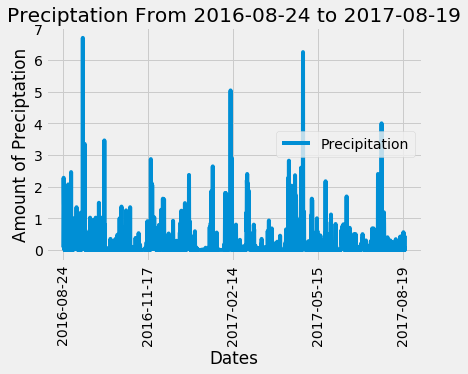

In [46]:
df.plot(y='Precipitation')
plt.title("Preciptation From 2016-08-24 to 2017-08-19")
plt.xlabel("Dates")
plt.ylabel("Amount of Preciptation")
plt.xticks(rotation=90)

In [47]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# Design a query to show how many stations are available in this dataset?


In [24]:
#design a query to list the number of stations 
from sqlalchemy import func
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [28]:
#list the stations in descending order
from sqlalchemy import func
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
#most active station is USC00519281
#do a query
q = session.query(Measurement).\
	filter(Measurement.station == 'USC00519281')
session.query(q.exists())

session.query(Measurement.station, Measurement.date, Measurement.prcp).filter(q.exists()).all()

[('USC00519397', '2010-01-01', 0.08),
 ('USC00519397', '2010-01-02', 0.0),
 ('USC00519397', '2010-01-03', 0.0),
 ('USC00519397', '2010-01-04', 0.0),
 ('USC00519397', '2010-01-06', None),
 ('USC00519397', '2010-01-07', 0.06),
 ('USC00519397', '2010-01-08', 0.0),
 ('USC00519397', '2010-01-09', 0.0),
 ('USC00519397', '2010-01-10', 0.0),
 ('USC00519397', '2010-01-11', 0.01),
 ('USC00519397', '2010-01-12', 0.0),
 ('USC00519397', '2010-01-14', 0.0),
 ('USC00519397', '2010-01-15', 0.0),
 ('USC00519397', '2010-01-16', 0.0),
 ('USC00519397', '2010-01-17', 0.0),
 ('USC00519397', '2010-01-18', 0.0),
 ('USC00519397', '2010-01-19', 0.0),
 ('USC00519397', '2010-01-20', 0.0),
 ('USC00519397', '2010-01-21', 0.0),
 ('USC00519397', '2010-01-22', 0.0),
 ('USC00519397', '2010-01-23', 0.0),
 ('USC00519397', '2010-01-24', 0.01),
 ('USC00519397', '2010-01-25', 0.0),
 ('USC00519397', '2010-01-26', 0.04),
 ('USC00519397', '2010-01-27', 0.12),
 ('USC00519397', '2010-01-28', 0.0),
 ('USC00519397', '2010-01-30', 

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
